## The MNIST Dataset

The MNIST (modified national institute of standards and technology) Dataset  is a a computer vision dataset. it consists of 60,000 training datapoints and 10,000 testing datapoints. Each datapoint consists of a 28x28 pixel image. This image represents a handwriten digit. The MNIST dataset is a sub set of the much larger NIST dataset where by the digits have been size normalised to the 28x28 pixel size and they have been centrered. This formating and pre processing allows for a normailsed dataset so that we can get as acurate as possible results from our machine learning algorythms.

For machine learning classification we need fetures and labels for the data. Features being the peices of information or varibles for each datapoint and the label being the classification assigned to that datapoint. We previously discused the IRIS dataset in another notebook in this repository whereby there was 4 features and a label for each datapoint. The MNIST data set is a little more complex. For each datapoint we have a 28x28 pixel image and a label stateing what number that image is ment to represent. 

This 28x28 pixel image is represented by a numpy array with the shape (28,28) with each digit in the array represent a pixel. Each value in this array ranges between 0 and 1. 0 being white 1 being black and the numbers between being varrying degrees of gray. as shown by the image below from Christopher Olahs blog on The MNIST Dataset.

<img src="img/MNIST_Array.jpg" />

To suit our purposes of machinelearning we need to reformat this data so that we can split it into individual features as discused earlyer. To do this we simmply flatten the 28x28 array into 784 dimensional vector. now we have 784 individual varibles or features describing the intensity of a pixel at a given point in the image. we now have a datapoint we can use. 

with the IRIS dataset we had datapoints that had 4 features and 1 label now after flattening the arrays representing the images we have a dataset that's datapoints have 784 features and 1 label.

In [1]:
#import numpy for use of efficent arrays.
import numpy as np
#import pandas for reading iin the csv file.
import pandas as pd
#import matplotlib to plot graphs.
import matplotlib.pyplot as plt
#import the train.csv file which contains data into a varible called data.
data = pd.read_csv('./resources/train.csv')

#shows that we have 785 columns per row and 42,000 rows. 
data.shape

(42000, 785)

To get a simple representation of this data we will plot the information in a given row as a 28x28 pixel grid and print the label beneth to show that the training file we imported acctualy dose represent the hand written digits of the MNIST dataset.

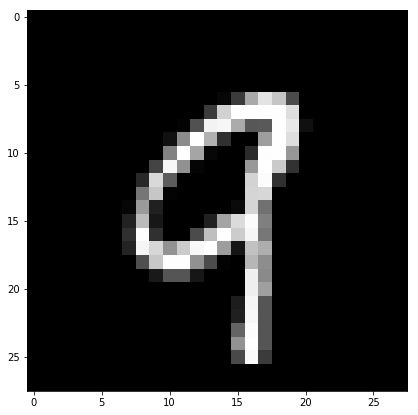

9


In [2]:
#creates array of labels called l
l = data['label']
#creates array with all but the labels called d
d = data.drop("label",axis=1) 
#sets the image size for the plot
plt.figure(figsize=(7,7))


#changeable index value which selects with datapoint to display bellow
#you can change this value as you please to see other values from the data set.
index = 41999


#shapes the dataframe at the given index back to a 28x28 array
shapedData = d.iloc[index].values.reshape(28,28)
#plots the reshaped datapoint as an image useing the grayscale cmap with no interpolation
plt.imshow(shapedData,interpolation="none",cmap="gray")
#shows plot
plt.show()
#prints the label of the same ploted image.
print(l[index])

Try changeing the index in the code above and ass you can see a difrent image will be drawn and its label will be printed bellow it. as long as the index is under 42000 as that is the number of enterys in the dataset.

## Efficiency.

As seen above we have a simple implementation of the MNIST dataset we simply loaded the csv file into memory using pandas read_csv functionality and while this may be sufficent for browseing the data and displaying individual datapoints from the dataset as seen above. This would prove very ineffeciant to use for machine learning. As we saw with the Iris dataset we had 150 data points each with 4 features and 1 label. To simplify we had 750 peices of information(150x5). This is a very small set of data and as such did not require much change to get quick results. Now take the MNIST data set we have 784 features and 1 label per data point and in this example 42,000 datapoints or again to simplify 32,970,000(785x42000) peices of information. This institutes a need for us to more efficently load this data into memory so training our suprovised machine learning algorythms do not take excesive amounts of time.

Most common machine learning packages such as tensorflow contain predefind methods that will load the MNIST dataset into memory incredibly efficently as it is such a widely used dataset for study and education.

We can modify the data most commonly with a python package known as theano which is used to optomise manipulate and evaluate mathematical expresions. this allows us to omptimse the data for GPU(Graphics Processing Unit) processing. 

We load our data into whats know as a shared varible. Shared Variables are a feature of the programming language which allows programs running on one processor to share information with another processor or in this case the GPU. 

To process on a GPU we want the values to be floats as GPU's accel at floating point calculations. This speed is why we wish to optimise for the the gpu in the first place.Copying to the Gpu from the cpu can be a slow process, we would not want to have to individually transfer from the CPU to the GPU, do the calculation and then transfer the next peice of information from CPU to GPU. The overhead of all these copys would potentialy increase computation. Idealy we would want to copy the entire dataset over to the gpu to process in one go.Thus vastly decreaseing the copying overhead. The problem with this is unless useing a very powerful machine or a least a machine with a powerful GPU with a high amount of ram(random access memory) the data set will execeed the size of the memory in the gpu and crash.

To avoid this problem a commonly used technique is to define a batch size that will represent the amount of datapoints copyed over to the gpu at a given time. then when processesing the data this value will be used to set the size of the batch of data to be copyed over. This gives us the benifit of the vastly more powerful calculation time of a gpu while avoiding the overhead of copying the information peice by peice and yet still not requireing excesive amounts of GPU memory.

having our training done by the GPU is alot more efficent than when done on the cpu in some cases by more than a factor of 10.
as seen in the image below a high range amd processer acives on average  440 examples/sec the equivelent intel processer acives a similar 415 exaples/sec then when we move on to the GPU's a low range mobile/laptop gpu achives a much higher 1190 examples/sec and then when we move onto a dedicated mid range GPU it jumps to an incredible 6500 examples/sec. speeds much high can be achived with even higher teirs of GPU as the Geforce 1070 discused here is a common mid range GPU retailing somewhere in the range of 400 euro.

<img src="img/cpuvsgpu.jpg" />

## Summary

in this notebook we have discused the MNIST dataset and how to efficently load it into memory in python. we covered how the data set conists of thousands of 28x28 pixel images that are flatened into 784 dimensional vectors. these vectors are much easier to manipulate and use in machine learning than the previous pixel arays. we also showed how we can plot this multidensional vectors back into 28x28 pixel images to show the MNIST hand drawn numbers. Finaly we discused how we can optomise our dataset for GPU processing vastly increaseing the speed at which the dataset can be used for machine learning. The information gathered for this jupyter notebook was aquired from kaggles github repository on the MNIST dataset, the MNIST dataset website, Christopher Olah's blog post on visualising the MNIST dataset and finaly the metrics for the gpu and cpu comparisons where aquired from Andriy Lazorenko artcile on tensorflow perforce tests between cpu and gpu.

https://github.com/tgjeon/kaggle-MNIST

http://yann.lecun.com/exdb/mnist/

http://colah.github.io/posts/2014-10-Visualizing-MNIST/

https://medium.com/@andriylazorenko/tensorflow-performance-test-cpu-vs-gpu-79fcd39170c